In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Overview
### 1. MRW file

In [72]:
xls = pd.ExcelFile('dataset/MRW_v2.xlsx')
sheet1 = pd.read_excel(xls, 'Transaction')
sheet2 = pd.read_excel(xls, 'SKU_point_Ltr')
sheet3 = pd.read_excel(xls, 'Garange Profile')
sheet4 = pd.read_excel(xls, 'User')

In [77]:
print(sheet1.shape)
# sheet1.sample(5)

(215656, 5)


,Distributor,ProductName,ProductSKU,ScanDate,UserId
165036,D,Mobil Super FF,Mobil Super FF 4L - 7L,2023-09-07,EXL_1623509340705
153178,A,Mobil Super AIO,Charcoal - Large 4L - 5L,2023-08-27,EXL_1629968899040
190481,A,Mobil Super FF,Mobil Super FF 4L - 7L,2023-11-02,EXL_1576758423213
194508,A,Silver Large,Silver - Large 4L,2023-08-16,EXL_1588852428447
83949,A,Silver Large,Silver - Large 4L,2023-05-06,EXL_1641897640593


In [78]:
count_per_garange = sheet1.groupby('UserId').agg({'ScanDate': 'count'}).rename(columns={'ScanDate': 'Qty'})
sheet1_clean = pd.merge(sheet1.drop_duplicates(), count_per_garange, on='UserId', how='left')
sheet1_clean.head()

,Distributor,ProductName,ProductSKU,ScanDate,UserId,Qty
0,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,32
1,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-24,EXL_1692444744991,32
2,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-22,EXL_1692444744991,32
3,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-19,EXL_1692444744991,32
4,A,Mobil Super FF,Mobil Super FF 4L - 7L,2023-11-24,EXL_1652546700176,39


In [80]:
print(sheet2.shape)
# sheet2.head()

(10, 3)


,ProductSKU,Points,Volume (L)
0,Mobil 1 Gold 4L - 6L,60,6
1,Silver - Large 4L,50,4
2,Gold - Large 4L,50,4
3,Mobil Super AIO - 7L,45,7
4,Mobil Super AIO 3L - 6L,40,5


In [81]:
print(sheet3.shape)
# sheet3.head()

(4006, 5)


,OwnerId,Postcode,Province,District,Distributor
0,EXL_1569434212261,10310.0,กรุงเทพมหานคร,เขตห้วยขวาง,A
1,EXL_1569438736165,10250.0,กรุงเทพมหานคร,เขตประเวศ,A
2,EXL_1569513392397,10120.0,กรุงเทพมหานคร,เขตสาทร,A
3,EXL_1569861369270,50130.0,เชียงใหม่,เขตสันกำแพง,C
4,EXL_1569867483497,73160.0,นครปฐม,เขตสามพราน,B


In [83]:
print(sheet4.shape)
# sheet4.head()

(4719, 3)


,UserId,GarageId,UserType
0,EXL_1569429819465,TX4276,Owner
1,EXL_1569431062769,IP0146,Owner
2,EXL_1569431134633,AF0708,Employee
3,EXL_1569431146924,TX4276,Employee
4,EXL_1569432034271,TX4276,Employee


In [84]:
merge_1 = pd.merge(sheet1_clean, sheet2, on='ProductSKU', how='left')
merge_2 = pd.merge(merge_1, sheet3, left_on=['UserId', 'Distributor'], right_on=['OwnerId', 'Distributor'], 
                   how='left')
mrw = pd.merge(merge_2, sheet4, on='UserId', how='left')

In [85]:
print(mrw.shape)
mrw.head()

(36015, 14)


,Distributor,ProductName,ProductSKU,ScanDate,UserId,Qty,Points,Volume (L),OwnerId,Postcode,Province,District,GarageId,UserType
0,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,32,45,7,EXL_1692444744991,72000.0,สุพรรณบุรี,เขตศรีประจันต์,AA3539,Owner
1,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-24,EXL_1692444744991,32,45,7,EXL_1692444744991,72000.0,สุพรรณบุรี,เขตศรีประจันต์,AA3539,Owner
2,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-22,EXL_1692444744991,32,45,7,EXL_1692444744991,72000.0,สุพรรณบุรี,เขตศรีประจันต์,AA3539,Owner
3,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-19,EXL_1692444744991,32,45,7,EXL_1692444744991,72000.0,สุพรรณบุรี,เขตศรีประจันต์,AA3539,Owner
4,A,Mobil Super FF,Mobil Super FF 4L - 7L,2023-11-24,EXL_1652546700176,39,35,6,NaN,NaN,NaN,NaN,AC9774,Employee


Handle null/ missing values

In [86]:
mrw.columns

Index(['Distributor', 'ProductName', 'ProductSKU', 'ScanDate', 'UserId', 'Qty',
       'Points', 'Volume (L)', 'OwnerId', 'Postcode', 'Province', 'District ',
       'GarageId', 'UserType'],
      dtype='object')

In [132]:
mrw.dtypes

Distributor            object
ProductName            object
ProductSKU             object
ScanDate       datetime64[ns]
UserId                 object
Qty                     int64
Points                  int64
Volume (L)              int64
OwnerId                object
Postcode                int32
Province               object
District               object
GarageId               object
UserType               object
dtype: object

In [87]:
mrw.rename(columns={'District ': 'District'}, inplace=True)
mrw.isnull().sum()

Distributor       0
ProductName       0
ProductSKU        0
ScanDate          0
UserId            0
Qty               0
Points            0
Volume (L)        0
OwnerId        3649
Postcode       3757
Province       3649
District       3649
GarageId          0
UserType          0
dtype: int64

In [88]:
null_province = mrw[ mrw['Province'].isnull() ].index
# drop unreliability records -> don't have province, district
mrw.drop(index=null_province, inplace=True)

mrw.spe

(32366, 14)

In [89]:
# fill null Postcode with 0
mrw['Postcode'] = mrw['Postcode'].fillna(0).astype('int')

Distributor per Province

In [124]:
dis_per_province = mrw.groupby(['Distributor', 'Province']).agg({'UserId': 'count'}).reset_index()
dis_per_province.sample(10)

,Distributor,Province,UserId
22,A,ร้อยเอ็ด,43
58,C,อุตรดิตถ์,815
26,A,สมุทรปราการ,739
65,D,ชุมพร,472
15,A,ปทุมธานี,635
45,B,สุพรรณบุรี,338
52,C,พะเยา,30
40,B,นครปฐม,985
32,A,หนองบัวลำภู,32
23,A,ลพบุรี,264


#### EDA

In [121]:
len(mrw['GarageId'].unique())

1272

In [111]:
mrw.columns

Index(['Distributor', 'ProductName', 'ProductSKU', 'ScanDate', 'UserId', 'Qty',
       'Points', 'Volume (L)', 'OwnerId', 'Postcode', 'Province', 'District',
       'GarageId', 'UserType'],
      dtype='object')

In [133]:
mrw.dtypes

Distributor            object
ProductName            object
ProductSKU             object
ScanDate       datetime64[ns]
UserId                 object
Qty                     int64
Points                  int64
Volume (L)              int64
OwnerId                object
Postcode                int32
Province               object
District               object
GarageId               object
UserType               object
dtype: object

In [134]:
mrw['Postcode'] = mrw['Postcode'].astype(str)

In [135]:
mrw.dtypes

Distributor            object
ProductName            object
ProductSKU             object
ScanDate       datetime64[ns]
UserId                 object
Qty                     int64
Points                  int64
Volume (L)              int64
OwnerId                object
Postcode               object
Province               object
District               object
GarageId               object
UserType               object
dtype: object

In [122]:
# Group by 'ProductSKU' and sum the 'Qty'
sku_qty_totals = mrw.groupby('ProductSKU')['Qty'].sum().reset_index()

# Rename the columns for better understanding
sku_qty_totals.columns = ['ProductSKU', 'TotalQty']
sku_qty_totals = sku_qty_totals.sort_values(by='TotalQty', ascending=False)
sku_qty_totals = sku_qty_totals.reset_index(drop=True)

# Display the result
sku_qty_totals

,ProductSKU,TotalQty
0,Mobil Super FF 4L - 7L,5562932
1,Mobil Delvac Modern 7L,1768325
2,Charcoal - Large 4L - 5L,1389121
3,Mobil Super AIO - 7L,1255133
4,Silver - Large 4L,805995
5,Gold - Large 4L,702098
6,Mobil 1 Gold 4L - 6L,633652
7,Mobil_Delvac_Legend_6L_-_7L,299792
8,Blue - Large 4L - 5L,284729
9,Mobil Super AIO 3L - 6L,56092


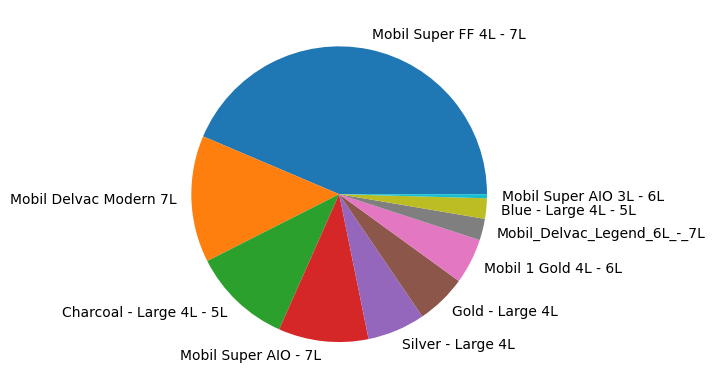

In [138]:
plt.pie(sku_qty_totals['TotalQty'], labels=sku_qty_totals['ProductSKU'])
plt.Circle(xy=5)

plt.show()

### 2. MER file

In [98]:
mer = pd.ExcelFile('dataset/2. MER PointTransaction 2023_RetailsResellers_Final.xlsx')
mer_sheet1 = pd.read_excel(mer, 'MER Transaction')
mer_sheet2 = pd.read_excel(mer, 'Point Per Litre')

In [99]:
print(mer_sheet1.shape)
mer_sheet1.head()

(9429, 8)


,Invoicedate,Distributor,GroupId,Type,Provincename,MatNo,Material Name,New_Volume(L)
0,2023-02-14,A,ERW_AI8N2021070006,Retails,Pathum Thani,123150,"MOBIL MULTIPURPOSE ATF, 208LT DR",7168
1,2023-04-20,D,ERW_DBG72020110082,Reseller,Songkhla,124213,MOBIL ATF 220 D 208LT,912
2,2023-10-19,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7340
3,2023-07-25,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,1640
4,2023-10-12,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7080


In [100]:
print(mer_sheet2.shape)
mer_sheet2.head()

(145, 2)


,MatNo,Points
0,144673,10
1,140521,10
2,144473,10
3,145832,10
4,140418,10


In [101]:
mer = pd.merge(mer_sheet1, mer_sheet2, on='MatNo', how='left')
print(mer.shape)
mer.head()

(9429, 9)


,Invoicedate,Distributor,GroupId,Type,Provincename,MatNo,Material Name,New_Volume(L),Points
0,2023-02-14,A,ERW_AI8N2021070006,Retails,Pathum Thani,123150,"MOBIL MULTIPURPOSE ATF, 208LT DR",7168,1
1,2023-04-20,D,ERW_DBG72020110082,Reseller,Songkhla,124213,MOBIL ATF 220 D 208LT,912,1
2,2023-10-19,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7340,1
3,2023-07-25,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,1640,1
4,2023-10-12,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7080,1


Null/ missing values

In [79]:
mer.columns

Index(['Invoicedate', 'Distributor', 'GroupId', 'Type', 'Provincename',
       'MatNo', 'Material Name', 'New_Volume(L)', 'Points'],
      dtype='object')

In [82]:
mer.isnull().sum()

Invoicedate      0
Distributor      0
GroupId          0
Type             0
Provincename     0
MatNo            0
Material Name    0
New_Volume(L)    0
Points           0
dtype: int64

Fix Typos of Material Name

In [93]:
mat_default = mer_sheet1.sort_values(['MatNo', 'Material Name']).groupby('MatNo').head(1)\
                        .loc[:, ['MatNo', 'Material Name']].set_index('MatNo')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('โมบิล', 'MOBIL')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('เดลแวค', 'DELVAC')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('สเปเชียล', 'SPECIAL')
mat_default.loc[ mat_default.index == 140563, 'Material Name'] = 'MOBIL DELVAC 1 GEAR OIL 75W90, 1/35LB'

mat_default.shape
# with pd.option_context('display.max_rows', None):
#     display(mat_default)

(145, 1)

In [95]:
for i in mer['MatNo'].unique():
    mer.loc[mer['MatNo'] == i, 'Material Name'] = mat_default.loc[i, 'Material Name']
            
mer[ ['MatNo', 'Material Name']].drop_duplicates().shape

(145, 2)

In [96]:
mer.dropna(inplace=True)
mer.isnull().any()

Invoicedate      False
Distributor      False
GroupId          False
Type             False
Provincename     False
MatNo            False
Material Name    False
New_Volume(L)    False
Points           False
dtype: bool

#### EDA
Points per อู่

In [140]:
mer['Provincename'] = mer['Provincename'].replace('N\A', np.nan)
mer[mer['Provincename'].isnull()].head()

,Invoicedate,Distributor,GroupId,Type,Provincename,MatNo,Material Name,New_Volume(L),Points
1705,2023-11-03,A,ERW_A7QF2022060002,Retails,NaN,140043,MOBIL ATF 3309 12x1L/CAR,5392,1
1845,2023-02-13,A,ERW_A7QF2022060003,Retails,NaN,140418,MOBIL 1 TBD 5W-40 CTN 4X6L:TH,5088,10
1910,2023-02-13,A,ERW_A7QF2022060003,Retails,NaN,140521,MOBIL 1 0W-40 CTN 4X4L:SG,608,10
2260,2023-02-13,A,ERW_A7QF2022060003,Retails,NaN,142923,MOBIL SPECIAL 20W-50 CTN 4X4L:TH,6544,1
2275,2023-10-26,A,ERW_A7QF2022060003,Retails,NaN,142923,MOBIL SPECIAL 20W-50 4X4L/CAR,1104,1


In [141]:
result = mer.groupby('Distributor')['Provincename'].apply(lambda x: list(x.unique())).reset_index()
result.columns = ['Distributor', 'Unique Provinces']
result

,Distributor,Unique Provinces
0,A,"[Pathum Thani, Chon Buri, Chachoengsao, Rayong..."
1,B,"[Kanchanaburi, Nakhon Pathom, Samut Sakhon, Ba..."
2,C,"[Sukhothai, Kamphaeng Phet, Chon Buri, Phrae, ..."
3,D,"[Songkhla, Surat Thani, Pattani, Phangnga, Phu..."


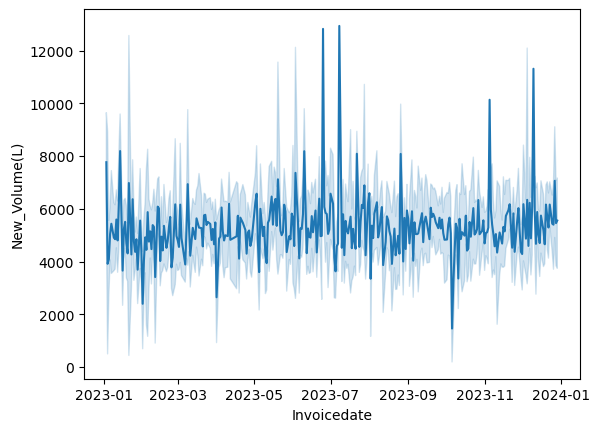

In [142]:
# Trending of sales in mer
sns.lineplot(data=mer, x='Invoicedate', y='New_Volume(L)')
plt.show()

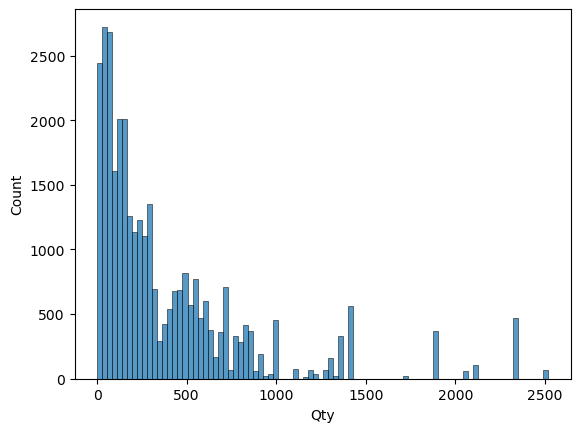

In [149]:
# count of mrw
# sns.lineplot(data=mrw, x='ScanDate', y='count')

# order per day
sns.histplot(data=mrw, x='Qty')
plt.show()

Text(0.5, 1.0, 'Sales over quarter')

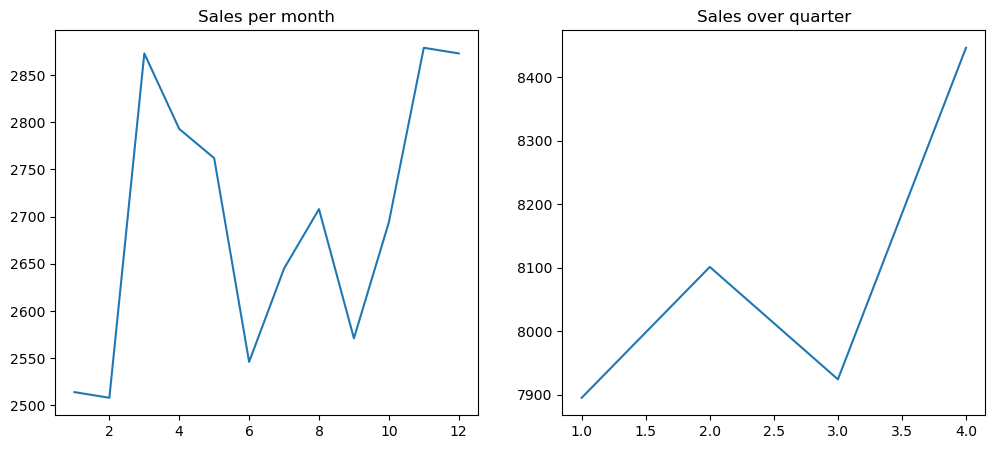

In [152]:
time_series = mrw.copy()
time_series['Month'] = mrw['ScanDate'].dt.month
time_series['Year'] = mrw['ScanDate'].dt.year
time_series['Quarter'] = mrw['ScanDate'].dt.quarter

sales_per_month = time_series.groupby(['Year', 'Month']).agg({'UserId': 'count'}).\
                                rename(columns={'UserId': 'quantity'}).reset_index()
sales_per_quarter = time_series.groupby(['Year', 'Quarter']).agg({'UserId': 'count'})\
                                .rename(columns={'UserId': 'quantity'}).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(sales_per_month['Month'], sales_per_month['quantity'])
ax[0].set_title('Sales per month')

ax[1].plot(sales_per_quarter['Quarter'], sales_per_quarter['quantity'])
ax[1].set_title('Sales over quarter')